The non kaggle notebooks are just brief presentations of my exploring process of the dataset

# First contact
Open the files and look at them very briefly

In [120]:
import pandas as pd

train = pd.read_csv("../data/base/train.csv", nrows=100)
test = pd.read_csv("../data/base/test.csv", nrows=100)
submission = pd.read_csv("../data/base/sample_submission.csv", nrows=100)
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train.shape

(100, 785)

In [124]:
images = train.iloc[:, 1:]
images.shape

(100, 784)

In [125]:
first_image = images.iloc[0].as_matrix()
first_image.shape

(784,)

In [13]:
import numpy as np
np.sqrt(784)

28.0

In [15]:
first_image.reshape((28, 28)).shape

(28, 28)

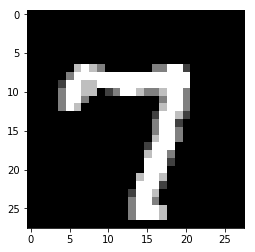

In [129]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(images.sample(1).as_matrix().reshape((28, 28)), cmap='gist_gray');

# Second contact
Load the csvs, checkout the sizes

Train: (42000, 785) 
  X: (42000, 784)
  y: (42000,)
Test: (28000, 784)
Sample: (28000, 2)


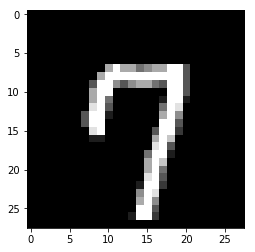

In [131]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

DATA = '../data'
TRAIN = f'{DATA}/base/train.csv'
TEST = f'{DATA}/base/test.csv'
SAMPLE_SUBMISSION = f'{DATA}/base/sample_submission.csv'

def read(file_path, nrows=None):
    return pd.read_csv(file_path, nrows=nrows)

def show_sample(X):
    plt.imshow(X.sample(1).as_matrix().reshape((28, 28)), cmap='gist_gray')
    plt.show();

train = read(TRAIN)
X_submit = read(TEST)
sample_submission = read(SAMPLE_SUBMISSION) # 0.10014

X = train.iloc[:, 1:]
y = train.iloc[:, 0]

print(f"Train: {train.shape} \n  X: {X.shape}\n  y: {y.shape}\nTest: {X_submit.shape}\nSample: {sample_submission.shape}")
show_sample(X)

## Sample submission

The sample submission achieves a categorization precision of 0.10014, which today is rank 2789th out of 2806: just at 15 positions from the absolute bottom. It consist of a 1-indexed list of zeros. The submission can be reproduced using the script `submit.sh` as follows:

```bash

cp data/base/sample_submission.csv data/submissions/
./scripts/submit.sh sample_submission.csv "This is the sample submission"
```

In [132]:
sample_submission.set_index("ImageId").head(3)

,Label
ImageId,
1,0
2,0
3,0


# Trivial improvement to sample submission

Replace the zeros with the `mode` value (the digit which appears most times).

First let's see the mode value:

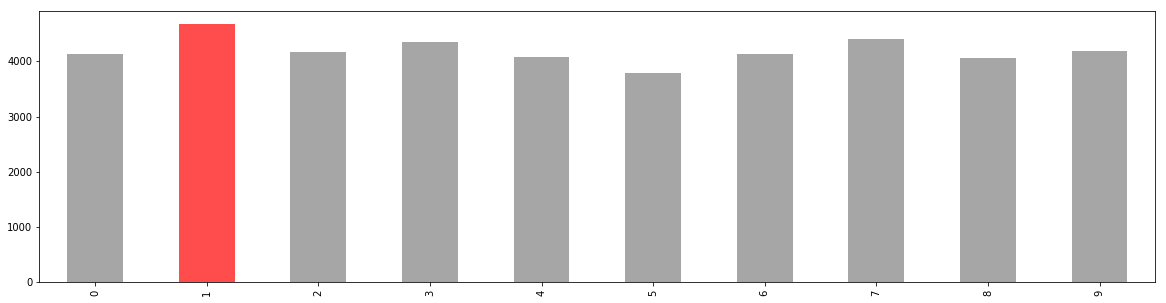

In [133]:
y.value_counts().sort_index().plot(kind='bar', figsize=(20, 5), alpha=0.7, 
                                   color=['r' if i == y.mode()[0] else 'gray' for i in range(10)]);

In [134]:
pd.DataFrame((y.value_counts().sort_index() / y.count()).round(3)).rename(columns={'label': 'Percentage'})

,Percentage
0,0.098
1,0.112
2,0.099
3,0.104
4,0.097
5,0.090
6,0.098
7,0.105
8,0.097
9,0.100


In [110]:
sample_submission['Label'] = 1
sample_submission.to_csv(f"{DATA}/submissions/dummy_all_ones.csv", index=False)

In [111]:
!head ../data/submissions/dummy_all_ones.csv

ImageId,Label
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


This submission achieves a score of 0.11614 and a position of 2745, advancing 44 positions and moving from 99 to 97% of the leaderboard: 
```
./scripts/submit.sh dummy_all_ones.csv "Dummy all ones"
```